In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/MyDrive/Project/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import cv2

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(train_dir, transform=train_transform)
test_data = datasets.ImageFolder(valid_dir, transform=test_transform) #transform removed

train_loader = DataLoader(train_data, batch_size=350, shuffle=True,num_workers=4)  #1024
test_loader = DataLoader(test_data, batch_size=350, shuffle=False,num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
train_data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper_bell___Bacterial_spot',
 'Pepper_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_sp

In [ ]:
n_class = len(train_data.classes)
n_class

38

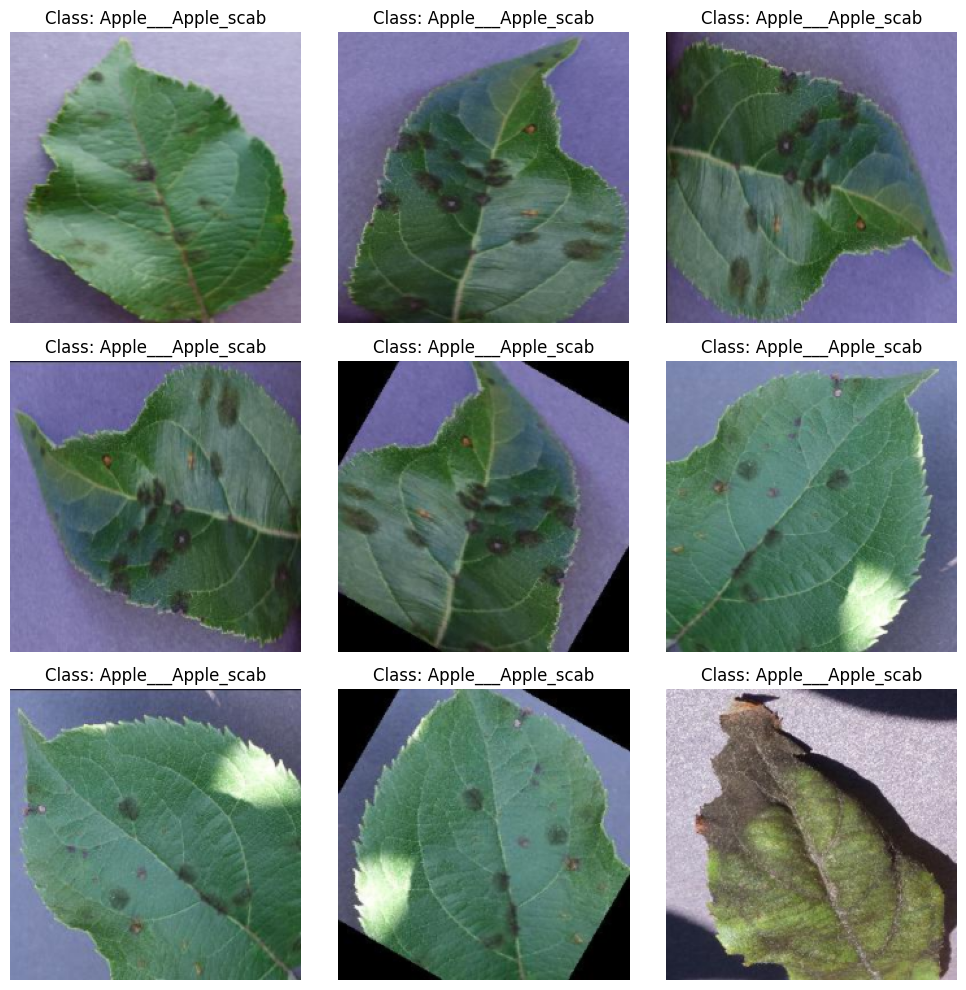

In [ ]:
# Visualize a few sample images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    image, label = train_data[i]  # Get image and label
    ax.imshow(image.permute(1, 2, 0))  # Matplotlib expects channels last
    ax.axis('off')
    ax.set_title(f"Class: {train_data.classes[label]}")
plt.tight_layout()
plt.show()

# Model Validation

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import classification_report


classes = train_data.classes
# print(n_class,len(classes))
# Function to evaluate the model on validation data
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    predictions = []
    ground_truths = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predictions.extend(predicted.cpu().numpy())
            ground_truths.extend(labels.cpu().numpy())

    accuracy = 100 * correct / total
    print(f'Accuracy on validation set: {accuracy:.2f}%')

    # Generate classification report
    print("Classification Report:")
    print(classification_report(ground_truths, predictions, target_names=classes))

# Model Testing

In [ ]:
import os

test_dir = "/content/drive/MyDrive/Project/New Plant Diseases Dataset(Augmented)"
test = datasets.ImageFolder(test_dir, transform=test_transform)


test_images = sorted(os.listdir(test_dir + '/test')) # since images in test folder are in alphabetical order
test_images

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']

In [ ]:
def predict_image(img, model):
    img =img.unsqueeze(0)
    image = img.to(device)
    output = model(image)
    _, preds = torch.max(output, 1)
    return train_data.classes[preds[0].item()]

# ResNet

In [ ]:
# Identify the last few layers

resnet = torchvision.models.resnet18(weights='DEFAULT')

num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, n_class)

layers_to_unfreeze = ['layer4.1.conv2.weight','layer4.1.bn2.weight','layer4.1.bn2.bias','fc.weight','fc.bias']

# Unfreeze the identified layers
for name, param in resnet.named_parameters():
    if any(layer_name in name for layer_name in layers_to_unfreeze):
      param.requires_grad = True
    else:
        param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth

100%|██████████| 44.7M/44.7M [00:00<00:00, 135MB/s] 


In [ ]:
resnet.to(device)

optimizer = optim.Adam(resnet.parameters(), lr=0.01)
# scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=100, mode='triangular')
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
criterion = nn.CrossEntropyLoss()

### ResNet Training

In [ ]:
num_epochs = 10
best_val_loss = float('inf')
patience = 5

for epoch in range(num_epochs):
    resnet.train()
    running_loss = 0.0

    # Training loop
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    # Validation loop
    resnet.eval()
    with torch.no_grad():
        running_val_loss = 0.0
        for val_images, val_labels in test_loader:
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = resnet(val_images)
            val_loss = criterion(val_outputs, val_labels)
            running_val_loss += val_loss.item() * val_images.size(0)

    val_epoch_loss = running_val_loss / len(test_loader.dataset)

    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        patience = 5
    else:
        patience -= 1
        if patience == 0:
            print("Early stopping triggered!")
            break

    # Step the scheduler
    scheduler.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}, Validation Loss: {val_epoch_loss:.4f}")

Epoch [1/10], Training Loss: 0.0246, Validation Loss: 0.0883

Epoch [2/10], Training Loss: 0.0167, Validation Loss: 0.0858

Epoch [3/10], Training Loss: 0.0116, Validation Loss: 0.0698

Epoch [4/10], Training Loss: 0.0065, Validation Loss: 0.0602

Epoch [5/10], Training Loss: 0.0021, Validation Loss: 0.0480

Epoch [6/10], Training Loss: 0.0012, Validation Loss: 0.0475

Epoch [7/10], Training Loss: 0.0010, Validation Loss: 0.0467

Epoch [8/10], Training Loss: 0.0009, Validation Loss: 0.0466

Epoch [9/10], Training Loss: 0.0007, Validation Loss: 0.0457

Epoch [10/10], Training Loss: 0.0007, Validation Loss: 0.0460


In [ ]:
evaluate_model(resnet, test_loader)

Accuracy on validation set: 98.63%

Classification Report:

                                                    precision    recall  f1-score   support



                                Apple___Apple_scab       1.00      0.99      0.99       504

                                 Apple___Black_rot       1.00      1.00      1.00       497

                          Apple___Cedar_apple_rust       0.99      0.99      0.99       440

                                   Apple___healthy       0.99      1.00      1.00       502

                               Blueberry___healthy       1.00      1.00      1.00       454

          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421

                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.94      0.95       410

                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477

        

In [ ]:
torch.save(resnet, 'resnet.pth')

In [ ]:
path = "/kaggle/input/pdc/pytorch/individual_model/2/resnet.pth"

resnet = torch.load(path)

In [ ]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, resnet))

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleScab1.JPG , Predicted: Apple___Apple_scab

Label: AppleScab2.JPG , Predicted: Apple___Apple_scab

Label: AppleScab3.JPG , Predicted: Apple___Apple_scab

Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_

Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_

Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_

Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight5.JPG , Predicted: Potato___Early_blight

Label: PotatoHealthy1.JPG , Predic

# EfficientNet

In [ ]:
efficientnet = torchvision.models.efficientnet_b7(weights='DEFAULT')

num_ftrs = efficientnet.classifier[-1].in_features
efficientnet.classifier[-1] = nn.Linear(num_ftrs, n_class)

layers_to_unfreeze = ['features.8.1.weight', 'features.8.1.bias', 'classifier.1.weight', 'classifier.1.bias']

# Unfreeze the identified layers
for name, param in efficientnet.named_parameters():
    if any(layer_name in name for layer_name in layers_to_unfreeze):
        param.requires_grad = True
    else:
        param.requires_grad = False

Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-c5b4e57e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b7_lukemelas-c5b4e57e.pth

100%|██████████| 255M/255M [00:01<00:00, 170MB/s]  


In [ ]:
efficientnet.to(device)

optimizer = optim.Adam(efficientnet.parameters(), lr=0.001)
# scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=100, mode='triangular')
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
criterion = nn.CrossEntropyLoss()

### EfficientNet Training

In [ ]:
num_epochs = 10
best_val_loss = float('inf')
patience = 5

for epoch in range(num_epochs):
    efficientnet.train()
    running_loss = 0.0

    # Training loop
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = efficientnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    # Validation loop
    efficientnet.eval()
    with torch.no_grad():
        running_val_loss = 0.0
        for val_images, val_labels in test_loader:
            val_images, val_labels = val_images.to(device), val_labels.to(device)

            val_outputs = efficientnet(val_images)
            val_loss = criterion(val_outputs, val_labels)
            running_val_loss += val_loss.item() * val_images.size(0)

    val_epoch_loss = running_val_loss / len(test_loader.dataset)

    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        patience = 5
    else:
        patience -= 1
        if patience == 0:
            print("Early stopping triggered!")
            break

    # Step the scheduler
    scheduler.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}, Validation Loss: {val_epoch_loss:.4f}")

Epoch [1/10], Training Loss: 1.3877, Validation Loss: 1.0775

Epoch [2/10], Training Loss: 0.5083, Validation Loss: 0.4502

Epoch [3/10], Training Loss: 0.3911, Validation Loss: 0.2980

Epoch [4/10], Training Loss: 0.3384, Validation Loss: 0.2454

Epoch [5/10], Training Loss: 0.3162, Validation Loss: 0.2202

Epoch [6/10], Training Loss: 0.2953, Validation Loss: 0.2175

Epoch [7/10], Training Loss: 0.2943, Validation Loss: 0.2151

Epoch [8/10], Training Loss: 0.2913, Validation Loss: 0.2136

Epoch [9/10], Training Loss: 0.2882, Validation Loss: 0.2120

Epoch [10/10], Training Loss: 0.2855, Validation Loss: 0.2110


In [ ]:
evaluate_model(efficientnet, test_loader)

Accuracy on validation set: 93.92%

Classification Report:

                                                    precision    recall  f1-score   support



                                Apple___Apple_scab       0.95      0.90      0.92       504

                                 Apple___Black_rot       0.97      0.96      0.96       497

                          Apple___Cedar_apple_rust       0.93      0.98      0.96       440

                                   Apple___healthy       0.94      0.95      0.94       502

                               Blueberry___healthy       0.95      0.97      0.96       454

          Cherry_(including_sour)___Powdery_mildew       0.97      0.96      0.97       421

                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.85      0.88       410

                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477

        

In [ ]:
torch.save(efficientnet, 'efficientnet.pth')

In [ ]:
path = "/kaggle/input/pdc/pytorch/individual_model/2/efficientnet.pth"

efficientnet = torch.load(path)

In [ ]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, efficientnet))

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleScab1.JPG , Predicted: Apple___Apple_scab

Label: AppleScab2.JPG , Predicted: Apple___Apple_scab

Label: AppleScab3.JPG , Predicted: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)

Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_

Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_

Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_

Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight5.JPG , Predicted: Potato___Early_blight

Label: Pot

# MobileNet

In [ ]:
from torchvision.models import mobilenet_v3_large

# Load the pre-trained MobileNetV3-Large model
mobilenet = mobilenet_v3_large(weights='DEFAULT')

# Freeze all the layers
for param in mobilenet.parameters():
    param.requires_grad = False

# Unfreeze the last few layers
unfreeze_layers = ['classifier']

for name, param in mobilenet.named_parameters():
    for layer in unfreeze_layers:
        if layer in name:
            param.requires_grad = True

# num_classes = n_class  # Change this to your desired number of classes
# print("class:", num_classes)
mobilenet.classifier = nn.Sequential(
    nn.Linear(960, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, n_class)
)

Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-5c1a4163.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-5c1a4163.pth

100%|██████████| 21.1M/21.1M [00:00<00:00, 88.4MB/s]


In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

mobilenet.to(device)

optimizer = optim.Adam(mobilenet.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1, verbose=True)

### MobileNet Training

In [ ]:
num_epochs = 10
best_val_loss = float('inf')
patience = 5

for epoch in range(num_epochs):
    mobilenet.train()
    running_loss = 0.0

    # Training loop
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = mobilenet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    # Validation loop
    mobilenet.eval()
    with torch.no_grad():
        running_val_loss = 0.0
        for val_images, val_labels in test_loader:
            val_images, val_labels = val_images.to(device), val_labels.to(device)

            val_outputs = mobilenet(val_images)
            val_loss = criterion(val_outputs, val_labels)
            running_val_loss += val_loss.item() * val_images.size(0)

    val_epoch_loss = running_val_loss / len(test_loader.dataset)

    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        patience = 5
    else:
        patience -= 1
        if patience == 0:
            print("Early stopping triggered!")
            break

    # Step the scheduler
    scheduler.step(val_epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}, Validation Loss: {val_epoch_loss:.4f}")


Epoch [1/10], Training Loss: 0.3240, Validation Loss: 0.4216

Epoch [2/10], Training Loss: 0.1347, Validation Loss: 0.1345

Epoch [3/10], Training Loss: 0.0930, Validation Loss: 0.0854

Epoch [4/10], Training Loss: 0.0692, Validation Loss: 0.0723

Epoch [5/10], Training Loss: 0.0552, Validation Loss: 0.0652

Epoch [6/10], Training Loss: 0.0437, Validation Loss: 0.0602

Epoch [7/10], Training Loss: 0.0354, Validation Loss: 0.0583

Epoch [8/10], Training Loss: 0.0296, Validation Loss: 0.0574

Epoch [9/10], Training Loss: 0.0242, Validation Loss: 0.0536

Epoch [10/10], Training Loss: 0.0195, Validation Loss: 0.0570


In [ ]:
evaluate_model(mobilenet, test_loader)

Accuracy on validation set: 98.05%

Classification Report:

                                                    precision    recall  f1-score   support



                                Apple___Apple_scab       0.98      0.99      0.98       504

                                 Apple___Black_rot       1.00      1.00      1.00       497

                          Apple___Cedar_apple_rust       1.00      0.98      0.99       440

                                   Apple___healthy       0.98      0.99      0.99       502

                               Blueberry___healthy       0.99      1.00      1.00       454

          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421

                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.96      0.96       410

                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477

        

In [ ]:
torch.save(mobilenet, 'mobilenet.pth')

In [ ]:
path = "/kaggle/input/pdc/pytorch/individual_model/2/mobilenet.pth"

mobilenet = torch.load(path)

In [ ]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, mobilenet))

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust

Label: AppleScab1.JPG , Predicted: Cherry_(including_sour)___Powdery_mildew

Label: AppleScab2.JPG , Predicted: Apple___Apple_scab

Label: AppleScab3.JPG , Predicted: Apple___Apple_scab

Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_

Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_

Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_

Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight

Label: PotatoEarlyBlight5.JPG , Predicted: Potato___Early_blight

Label: Potat

# LeafNet

In [ ]:
path1 = "/kaggle/input/pdc/pytorch/individual_model/2/resnet.pth" #Resnet
path2 = "/kaggle/input/pdc/pytorch/individual_model/2/efficientnet.pth" #EfficientNet
path3 = "/kaggle/input/pdc/pytorch/individual_model/2/mobilenet.pth" #MobileNet

resnet = torch.load(path1)
efficientnet = torch.load(path2)
mobilenet = torch.load(path3)

In [ ]:
print(f'Resnet : {resnet.fc.in_features}')
print(f'EfficientNet : {efficientnet.classifier[-1].in_features}')
print(f'MobileNet : {mobilenet.classifier[-4].in_features}')

Resnet : 512
EfficientNet : 2560
MobileNet : 960


In [ ]:
num_ftrs_resnet = resnet.fc.in_features
resnet.fc = nn.Identity()  # Remove classification head

num_ftrs_efficientnet = efficientnet.classifier[-1].in_features
efficientnet.classifier = nn.Identity()  # Remove classification head

num_ftrs_mobilenet = mobilenet.classifier[-4].in_features
mobilenet.classifier = nn.Identity()  # Remove classification head

print(num_ftrs_resnet+num_ftrs_efficientnet+num_ftrs_mobilenet)

4032


In [ ]:
class LeafNet(nn.Module):
    def __init__(self, num_classes):
        super(LeafNet, self).__init__()
        self.resnet = resnet
        self.efficientnet = efficientnet
        self.mobilenet = mobilenet
        self.fc = nn.Linear(num_ftrs_resnet + num_ftrs_efficientnet + num_ftrs_mobilenet, num_classes)

    def forward(self, x):
        x1 = self.resnet(x)
        x2 = self.efficientnet(x)
        x3 = self.mobilenet(x)
        x = torch.cat((x1.view(x1.size(0), -1), x2.view(x2.size(0), -1), x3.view(x3.size(0),-1)), dim=1)
        x = self.fc(x)
        return x

leafnet = LeafNet(n_class)

for param in leafnet.resnet.parameters():
    param.requires_grad = False
for param in leafnet.efficientnet.parameters():
    param.requires_grad = False
# for param in leafnet.mobilenet.parameters():
#     param.requires_grad = False
for param in leafnet.fc.parameters():
    param.requires_grad = True

print(leafnet.fc)

Linear(in_features=4032, out_features=38, bias=True)


In [ ]:
leafnet.to(device)

from torch.optim.lr_scheduler import ReduceLROnPlateau

optimizer = optim.Adam(leafnet.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1, verbose=True)

### LeafNet Training

In [ ]:
num_epochs = 10
best_val_loss = float('inf')
patience = 5

for epoch in range(num_epochs):
    leafnet.train()
    running_loss = 0.0

    # Training loop
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = leafnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    # Validation loop
    leafnet.eval()
    with torch.no_grad():
        running_val_loss = 0.0
        for val_images, val_labels in test_loader:
            val_images, val_labels = val_images.to(device), val_labels.to(device)

            val_outputs = leafnet(val_images)
            val_loss = criterion(val_outputs, val_labels)
            running_val_loss += val_loss.item() * val_images.size(0)

    val_epoch_loss = running_val_loss / len(test_loader.dataset)

    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        patience = 5
    else:
        patience -= 1
        if patience == 0:
            print("Early stopping triggered!")

            break
    scheduler.step(val_epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}, Validation Loss: {val_epoch_loss:.4f}")



Epoch [1/10], Training Loss: 0.2207, Validation Loss: 0.0542
Epoch [2/10], Training Loss: 0.0251, Validation Loss: 0.0387
Epoch [3/10], Training Loss: 0.0137, Validation Loss: 0.0319
Epoch [4/10], Training Loss: 0.0087, Validation Loss: 0.0296
Epoch [5/10], Training Loss: 0.0061, Validation Loss: 0.0272
Epoch [6/10], Training Loss: 0.0045, Validation Loss: 0.0256
Epoch [7/10], Training Loss: 0.0035, Validation Loss: 0.0256
Epoch [8/10], Training Loss: 0.0029, Validation Loss: 0.0249
Epoch [9/10], Training Loss: 0.0024, Validation Loss: 0.0251
Epoch [10/10], Training Loss: 0.0020, Validation Loss: 0.0242


In [ ]:
torch.save(leafnet, 'LeafNet.pth')

In [ ]:
path = "/kaggle/working/LeafNet.pth"

leafnet = torch.load(path)

In [ ]:
evaluate_model(leafnet, test_loader)

Accuracy on validation set: 99.29%
Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      1.00      1.00       504
                                 Apple___Black_rot       1.00      1.00      1.00       497
                          Apple___Cedar_apple_rust       1.00      1.00      1.00       440
                                   Apple___healthy       0.99      1.00      1.00       502
                               Blueberry___healthy       1.00      1.00      1.00       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.95      0.96       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(

In [ ]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, leafnet))

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleScab1.JPG , Predicted: Apple___Apple_scab
Label: AppleScab2.JPG , Predicted: Apple___Apple_scab
Label: AppleScab3.JPG , Predicted: Apple___Apple_scab
Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_
Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight5.JPG , Predicted: Potato___Early_blight
Label: PotatoHealthy1.JPG , Predicted: Potato___h

# Parenting Suggestion

In [ ]:
class LeafNet(nn.Module):
    def __init__(self, num_classes):
        super(LeafNet, self).__init__()
        self.resnet = resnet
        self.efficientnet = efficientnet
        self.mobilenet = mobilenet
        self.fc = nn.Linear(num_ftrs_resnet + num_ftrs_efficientnet + num_ftrs_mobilenet, num_classes)

    def forward(self, x):
        x1 = self.resnet(x)
        x2 = self.efficientnet(x)
        x3 = self.mobilenet(x)
        x = torch.cat((x1.view(x1.size(0), -1), x2.view(x2.size(0), -1), x3.view(x3.size(0),-1)), dim=1)
        x = self.fc(x)
        return x

In [ ]:
path = "/content/drive/MyDrive/Project/LeafNet.pth"

leafnet = torch.load(path, map_location=torch.device('cpu'))

In [ ]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, leafnet))
    if i==31:
      break

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleScab1.JPG , Predicted: Apple___Apple_scab
Label: AppleScab2.JPG , Predicted: Apple___Apple_scab
Label: AppleScab3.JPG , Predicted: Apple___Apple_scab
Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_
Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight5.JPG , Predicted: Potato___Early_blight
Label: PotatoHealthy1.JPG , Predicted: Potato___h

In [70]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

suggestionsDF = pd.read_excel("/content/drive/MyDrive/Project/Suggestions.xlsx", engine='openpyxl')
suggestionsDF.fillna('', inplace=True)
suggestionsDF

,specie,disease,suggestion
0,Apple,Apple scab,"Apples grow healthily in temperate climates with temperatures between 60°F to 75°F (15°C to 24°C), ensuring proper growth and fruit development. Consistent sunlight, well-drained soil, and moderate humidity levels promote optimal apple yields. Apple scab occurs due to fungal infection (Venturia inaequalis) favored by high humidity and wet conditions, spreading via spores in the air. Lack of proper orchard sanitation and inadequate fungicide applications can exacerbate scab occurrence. To treat apple scab on leaves, promptly remove and destroy infected leaves, improve air circulation, and apply fungicides containing active ingredients such as captan or sulfur according to label instructions. Consistent fungicide applications during the growing season help prevent further spread of the disease.\n\n"
1,Apple,Black rot,"Apples grow healthily in temperate climates with temperatures between 60°F to 75°F (15°C to 24°C), ensuring proper growth and fruit development. Consistent sunlight, well-drained soil, and moderate humidity levels promote optimal apple yields. Black rot on apple leaves often occurs due to the fungal pathogen Botryosphaeria obtusa, favored by warm, moist conditions and wounds. Poor air circulation, overwatering, and debris accumulation increase susceptibility to infection. To treat black rot on apple leaves, promptly remove infected foliage and practice thorough orchard sanitation. Apply fungicides containing active ingredients like captan or sulfur according to label instructions to prevent further spread.\n\n"
2,Apple,Cedar apple rust,"Apples grow healthily in temperate climates with temperatures between 60°F to 75°F (15°C to 24°C), ensuring proper growth and fruit development. Consistent sunlight, well-drained soil, and moderate humidity levels promote optimal apple yields. Cedar apple rust on apple leaves occurs due to fungal spores from cedar trees infecting susceptible apple varieties. Warm, moist conditions during spring facilitate spore germination and disease development on apple foliage. To manage cedar apple rust, apply fungicides containing active ingredients like myclobutanil or triadimefon during apple bud development and maintain proper sanitation by removing infected leaves and nearby cedar hosts to reduce spore sources."
3,Apple,healthy,
4,Blueberry,healthy,
5,Cherry_(including_sour),Powdery mildew,"Cherry trees thrive in temperate climates with well-defined seasons, requiring a certain number of chill hours for dormancy. They prefer full sun exposure and moderate temperatures, typically between 45°F to 85°F (7°C to 29°C), for optimal growth and higher fruit yields. Powdery mildew in cherries occurs due to the fungus Podosphaera clandestina, favored by warm temperatures, high humidity, and poor air circulation. Overcrowded tree canopies and dense foliage provide ideal conditions for fungal growth, leading to powdery mildew infections in cherries. To address powdery mildew in cherries, apply fungicides like sulfur or potassium bicarbonate preventatively during \nthe growing season and ensure proper air circulation by pruning trees to reduce fungal pressure. Regularly remove and dispose of infected plant parts to minimize the spread of the disease and promote tree health.\n\n"
6,Cherry_(including_sour),healthy,
7,Corn_(maize),Corn_(maize),"Corn thrives in warm temperatures between 60°F (15°C) and 95°F (35°C) for optimal growth and yield. Adequate sunlight, well-drained soil, and consistent moisture contribute to healthy corn plants and higher yields. Cercospora leaf spot in corn occurs due to infection by the fungus Cercospora zeae-maydis, favored by warm, humid conditions and extended leaf wetness periods. Overhead irrigation, dense foliage, and residue from previous crops can exacerbate the disease.. To manage Cercospora leaf spot and gray leaf spot in corn, implement fungicide applications targeted at controlling fungal growth and spread. Additionally,

Label: CornCommonRust2.JPG
Predicted Specie:  Corn_(maize)
Predicted Disease: Common rust
Suggestion: 


'Corn thrives in warm temperatures between 60°F (15°C) and 95°F (35°C) for optimal growth and yield. Adequate sunlight, well-drained soil, and consistent moisture contribute to healthy corn plants and higher yields.  Common rust in corn occurs due to the fungal pathogen Puccinia sorghi, favored by humid conditions and temperatures ranging from 60°F to 80°F (15°C to 27°C). Overcrowded planting, susceptible corn varieties, and high humidity levels contribute to its occurrence.   To manage common rust in corn, consider planting resistant varieties, employing crop rotation, and timely fungicide applications. Enhance airflow within the crop canopy and remove crop debris to mitigate disease spread.'

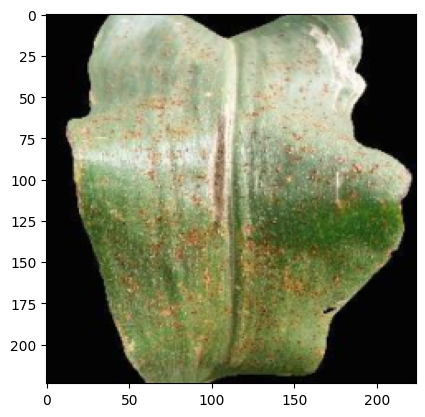

In [83]:
index = 8
img, label = test[index]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[index])
predicted =  predict_image(img, leafnet)
specie, disease = predicted.split("___")[0].strip(), " ".join(predicted.split("___")[1].split("_")).strip()
print('Predicted Specie: ',specie)
print(f'Predicted Disease: {disease}')

sg = suggestionsDF.loc[(suggestionsDF['specie']==specie) & (suggestionsDF['disease']==disease)]["suggestion"]
print("Suggestion: ")
sg.to_string(index=False)